# Visualisasi Data Kesejahteraan Pekerja Indonesia

Dataset asli dapat diakses pada pranala berikut: https://www.kaggle.com/datasets/rezkyyayang/pekerja-sejahtera


## Import Pustaka


In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly

from matplotlib import font_manager

font_path = 'Inter-Regular.ttf' 
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [2]:
PATH = './data/kesejahteraan_pekerja_indo'

upah_df = pd.read_csv(f'{PATH}/upah.df.csv')
ump_df = pd.read_csv(f'{PATH}/ump.df.csv')
gk_df = pd.read_csv(f'{PATH}/gk.df.csv')
peng_df = pd.read_csv(f'{PATH}/peng.df.csv')

## Exploratory Data Analysis


In [3]:
# deskripsi dataset upah
upah_df.tahun.value_counts()

upah_df.dtypes

provinsi    object
tahun        int64
upah         int64
dtype: object

In [4]:
# deskripsi dataset ump
print(f"Rentang tahun: {list(ump_df.tahun.unique())}")

print("Data kosong: ")
ump_na = ump_df[ump_df.isna().any(axis = 1)]
ump_na

Rentang tahun: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Data kosong: 


,provinsi,tahun,ump
189,KEP. RIAU,2002,NaN
190,KEP. RIAU,2003,NaN
191,KEP. RIAU,2004,NaN
483,KALIMANTAN UTARA,2002,NaN
484,KALIMANTAN UTARA,2003,NaN
485,KALIMANTAN UTARA,2004,NaN
486,KALIMANTAN UTARA,2005,NaN
487,KALIMANTAN UTARA,2006,NaN
488,KALIMANTAN UTARA,2007,NaN
489,KALIMANTAN UTARA,2008,NaN


In [5]:
print(f"Jenis-jenis GK: {list(gk_df.jenis.unique())}")
print(f"Rentang tahun: {list(gk_df.tahun.unique())}")
print(gk_df.periode.unique())


Jenis-jenis GK: ['MAKANAN', 'NONMAKANAN', 'TOTAL']
Rentang tahun: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2013, 2014]
['MARET' 'SEPTEMBER']


In [6]:
gk_na = gk_df[gk_df.isna().any(axis = 1)]
gk_na

,provinsi,jenis,daerah,tahun,periode,gk
104,ACEH,TOTAL,PERDESAANPERKOTAAN,2013,MARET,NaN
105,ACEH,TOTAL,PERDESAANPERKOTAAN,2013,SEPTEMBER,NaN
106,ACEH,TOTAL,PERDESAANPERKOTAAN,2014,MARET,NaN
107,ACEH,TOTAL,PERDESAANPERKOTAAN,2014,SEPTEMBER,NaN
260,SUMATERA UTARA,TOTAL,PERDESAANPERKOTAAN,2013,MARET,NaN
...,...,...,...,...,...,...
5255,PAPUA,TOTAL,PERDESAANPERKOTAAN,2014,SEPTEMBER,NaN
5408,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2013,MARET,NaN
5409,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2013,SEPTEMBER,NaN
5410,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2014,MARET,NaN


In [7]:
gk_total = gk_df[gk_df.daerah == "PERDESAANPERKOTAAN"]
gk_perdesaan = gk_df[gk_df.daerah == "PERDESAAN"]
gk_perkotaan = gk_df[gk_df.daerah == "PERKOTAAN"]

print(type(gk_total))

for index, row in gk_total.head(5).iterrows():
  gk_desa = gk_perdesaan[
      (gk_perdesaan.provinsi == row.provinsi) &
      (gk_perdesaan.jenis == row.jenis) &
      (gk_perdesaan.tahun == row.tahun) &
      (gk_perdesaan.periode == row.periode)
  ]

  gk_kota = gk_perkotaan[
      (gk_perkotaan.provinsi == row.provinsi) &
      (gk_perkotaan.jenis == row.jenis) &
      (gk_perkotaan.tahun == row.tahun) &
      (gk_perkotaan.periode == row.periode)
  ]

  print(gk_desa)
  print(gk_kota)
  print(row)
  print()



<class 'pandas.core.frame.DataFrame'>
  provinsi    jenis     daerah  tahun periode        gk
4     ACEH  MAKANAN  PERDESAAN   2015   MARET  297479.0
  provinsi    jenis     daerah  tahun periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015   MARET  293697.0
provinsi                  ACEH
jenis                  MAKANAN
daerah      PERDESAANPERKOTAAN
tahun                     2015
periode                  MARET
gk                    296406.0
Name: 8, dtype: object

  provinsi    jenis     daerah  tahun    periode        gk
5     ACEH  MAKANAN  PERDESAAN   2015  SEPTEMBER  306737.0
  provinsi    jenis     daerah  tahun    periode        gk
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
provinsi                  ACEH
jenis                  MAKANAN
daerah      PERDESAANPERKOTAAN
tahun                     2015
periode              SEPTEMBER
gk                    305428.0
Name: 9, dtype: object

  provinsi    jenis     daerah  tahun periode        gk
6     ACEH  MAKANAN  PERDE

In [8]:
# checking if the "total" calculation equals "makanan" + "nonmakanan"
gk_total = gk_df[(gk_df.tahun >= 2015) & (gk_df.gk != None) & (gk_df.jenis == "TOTAL")]
gk_makanan = gk_df[(gk_df.tahun >= 2015) & (gk_df.jenis == "MAKANAN")]
gk_nonmakanan = gk_df[(gk_df.tahun >= 2015) & (gk_df.jenis == "NONMAKANAN")]

print(gk_total.shape[0])
same_count = 0
print(gk_makanan)
for i, row in gk_total.iterrows():
  gk_makan = gk_makanan[
      (gk_makanan.provinsi == row.provinsi) &
      (gk_makanan.daerah == row.daerah) &
      (gk_makanan.tahun == row.tahun) &
      (gk_makanan.periode == row.periode)
  ]

  gk_nonmakan = gk_nonmakanan[
      (gk_nonmakanan.provinsi == row.provinsi) &
      (gk_nonmakanan.daerah == row.daerah) &
      (gk_nonmakanan.tahun == row.tahun) &
      (gk_nonmakanan.periode == row.periode)
  ]

  makan = gk_makan.iloc[0].gk
  nonmakan = gk_nonmakan.iloc[0].gk
  total = row.gk

  if (makan + nonmakan == total):
    same_count += 1

print(f"Same count: {same_count}, diff count: {gk_total.shape[0] - same_count}")

1680
       provinsi    jenis              daerah  tahun    periode        gk
0          ACEH  MAKANAN           PERKOTAAN   2015      MARET  293697.0
1          ACEH  MAKANAN           PERKOTAAN   2015  SEPTEMBER  302128.0
2          ACEH  MAKANAN           PERKOTAAN   2016      MARET  306243.0
3          ACEH  MAKANAN           PERKOTAAN   2016  SEPTEMBER  319768.0
4          ACEH  MAKANAN           PERDESAAN   2015      MARET  297479.0
...         ...      ...                 ...    ...        ...       ...
5347  INDONESIA  MAKANAN           PERDESAAN   2022  SEPTEMBER  391093.0
5348  INDONESIA  MAKANAN  PERDESAANPERKOTAAN   2021      MARET  349474.0
5349  INDONESIA  MAKANAN  PERDESAANPERKOTAAN   2021  SEPTEMBER  360007.0
5350  INDONESIA  MAKANAN  PERDESAANPERKOTAAN   2022      MARET  374454.0
5351  INDONESIA  MAKANAN  PERDESAANPERKOTAAN   2022  SEPTEMBER  397125.0

[1680 rows x 6 columns]
Same count: 1334, diff count: 346


In [9]:
# describing peng_df
peng_na = peng_df[peng_df.isna().any(axis = 1)]
peng_na

,provinsi,daerah,jenis,tahun,peng
1320,DKI JAKARTA,PERDESAAN,MAKANAN,2007,NaN
1321,DKI JAKARTA,PERDESAAN,MAKANAN,2008,NaN
1322,DKI JAKARTA,PERDESAAN,MAKANAN,2009,NaN
1323,DKI JAKARTA,PERDESAAN,MAKANAN,2010,NaN
1324,DKI JAKARTA,PERDESAAN,MAKANAN,2011,NaN
...,...,...,...,...,...
3147,KALIMANTAN UTARA,PERDESAANPERKOTAAN,NONMAKANAN,2014,NaN
3156,KALIMANTAN UTARA,PERDESAANPERKOTAAN,TOTAL,2011,NaN
3157,KALIMANTAN UTARA,PERDESAANPERKOTAAN,TOTAL,2012,NaN
3158,KALIMANTAN UTARA,PERDESAANPERKOTAAN,TOTAL,2013,NaN


## Transforming for Quality and Analysis


In [10]:
# only include data recorded after 2015 + exclude 'Indonesia' province

upah_df = upah_df[(upah_df.tahun >= 2015) & (upah_df.provinsi != 'INDONESIA')].reset_index(drop = True)
ump_df = ump_df[(ump_df.tahun >= 2015) & (ump_df.provinsi != 'INDONESIA')].reset_index(drop = True)
gk_df = gk_df[(gk_df.tahun >= 2015) & (gk_df.provinsi != 'INDONESIA')]
peng_df = peng_df[(peng_df.tahun >= 2015) & (peng_df.provinsi != 'INDONESIA')]

# drop DKI Jakarta - perdesaan data
gk_df = gk_df[~((gk_df.provinsi == 'DKI JAKARTA') & (gk_df.daerah == 'PERDESAAN'))]
peng_df = peng_df[~((peng_df.provinsi == 'DKI JAKARTA') & (peng_df.daerah == 'PERDESAAN'))]

# take only the september data
gk_df = gk_df[gk_df.periode == 'SEPTEMBER'].drop(columns = ['periode'])

In [11]:
gk_df.gk = gk_df.groupby(['provinsi', 'jenis', 'tahun'])['gk'].mean().round(0)
gk_df

/var/folders/dx/4c8f9zps2334_ngxgzvyjj4w0000gn/T/ipykernel_6450/731960322.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gk_df.gk = gk_df.groupby(['provinsi', 'jenis', 'tahun'])['gk'].mean().round(0)


,provinsi,jenis,daerah,tahun,gk
1,ACEH,MAKANAN,PERKOTAAN,2015,302128.0
3,ACEH,MAKANAN,PERKOTAAN,2016,319768.0
5,ACEH,MAKANAN,PERDESAAN,2015,306737.0
7,ACEH,MAKANAN,PERDESAAN,2016,324854.0
9,ACEH,MAKANAN,PERDESAANPERKOTAAN,2015,305428.0
...,...,...,...,...,...
5295,PAPUA,TOTAL,PERKOTAAN,2022,723346.0
5297,PAPUA,TOTAL,PERDESAAN,2021,582157.0
5299,PAPUA,TOTAL,PERDESAAN,2022,646116.0
5301,PAPUA,TOTAL,PERDESAANPERKOTAAN,2021,600795.0


In [12]:
# calculate gk_total and peng_total
gk_makanan = gk_df[gk_df.jenis == 'MAKANAN'].reset_index(drop = True)
gk_nonmakanan = gk_df[gk_df.jenis == 'NONMAKANAN'].reset_index(drop = True)

gk_total = gk_makanan.copy()
gk_total.jenis = 'TOTAL'

for i, row in gk_total.iterrows():
  gk_nonmakan = gk_nonmakanan[
      (gk_nonmakanan.provinsi == row.provinsi) &
      (gk_nonmakanan.tahun == row.tahun)
  ]

  nonmakan = gk_nonmakan.iloc[0].gk
  gk_total.at[i, 'gk'] += nonmakan

peng_makanan = peng_df[peng_df.jenis == 'MAKANAN'].reset_index(drop = True)
peng_nonmakanan = peng_df[peng_df.jenis == 'NONMAKANAN'].reset_index(drop = True)

peng_total = peng_makanan.copy()
peng_total.jenis = 'TOTAL'

for i, row in peng_total.iterrows():
  peng_nonmakan = peng_nonmakanan[
      (peng_nonmakanan.provinsi == row.provinsi) &
      (peng_nonmakanan.tahun == row.tahun)
  ]

  nonmakan = peng_nonmakan.iloc[0].peng
  peng_total.at[i, 'peng'] += nonmakan

In [13]:
# create new column in upah_df to know monthly projection + whether higher / lower than its actual ump
# projected workdays = 30 days in a month - 4 weekends * 2 days / weekend = 22 days
# one workday = 8 hrs, multiplied by 22 = 176

upah_df = upah_df.rename(columns = {'upah': 'upah_harian'})
upah_df['upah_bulanan'] = upah_df['upah_harian'] * 176
upah_df['dibawah_ump'] = None
upah_df['gap_upah_ump'] = None

PROVINSI_DICT = {
  "sumatera": ['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
      'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
      'KEP. RIAU'],
  "jawa": ['DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
      'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN'
  ],
  "jawa_pulau": [
    'BALI','NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR'
  ],
  "kalimantan": [
      'KALIMANTAN BARAT',
      'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR',
      'KALIMANTAN UTARA',
  ],
  "sulawesi":[
      'SULAWESI UTARA', 'SULAWESI TENGAH',
      'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'GORONTALO',
      'SULAWESI BARAT'
  ],
  "daerah_timur": [
    'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA'
  ]
}
for i, row in upah_df.iterrows():
  ump_row = ump_df[
      (ump_df.provinsi == row.provinsi) &
      (ump_df.tahun == row.tahun)
  ]

  ump = ump_row.iloc[0].ump
  upah_df.at[i, 'dibawah_ump'] = row.upah_bulanan < ump
  upah_df.at[i, 'gap_upah_ump'] = row.upah_bulanan - ump
  
  provinsi = row['provinsi'].lower()
  daerah = None
  
  for key, value in PROVINSI_DICT.items():
    if row['provinsi'] in value:
      daerah = key
      break
    
  upah_df.at[i, 'daerah'] = daerah

# upah_df[(upah_df.tahun == 2018) & (upah_df.dibawah_ump)]
upah_df.head()

,provinsi,tahun,upah_harian,upah_bulanan,dibawah_ump,gap_upah_ump,daerah
0,ACEH,2015,11226,1975776,False,75776.0,sumatera
1,ACEH,2016,13627,2398352,False,279852.0,sumatera
2,ACEH,2017,14809,2606384,False,106384.0,sumatera
3,ACEH,2018,13814,2431264,True,-268736.0,sumatera
4,ACEH,2019,15065,2651440,True,-265370.0,sumatera


In [14]:
upah_df[['provinsi', 'tahun', 'upah_bulanan', 'daerah']].to_excel("output/upah_bulanan.xlsx", index = False)

## Visualization


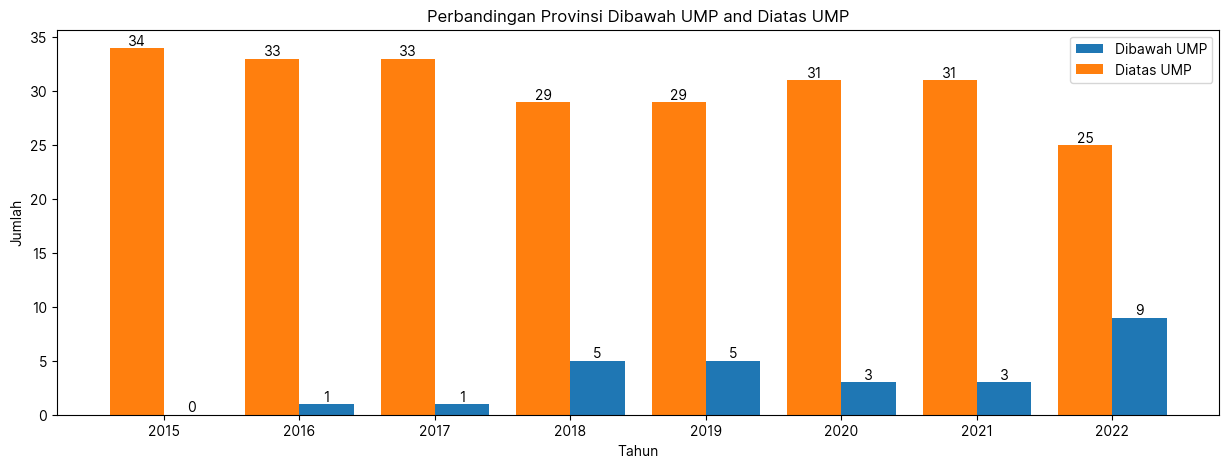

In [15]:
# perbandingan jumlah provinsi di bawah dan di atas UMP per tahun
year_df = upah_df.groupby(['tahun', 'dibawah_ump']).size().unstack().reset_index().fillna(0)
year_df = year_df.rename(columns = {False: 'diatas', True: 'dibawah'})

n = year_df['tahun'].nunique()
r = np.arange(n)
width = 0.4

plt.figure(figsize = (15, 5))

container_dibawah = plt.bar(r,year_df.dibawah, width = width, label = 'Dibawah UMP')
container_diatas = plt.bar(r - width, year_df.diatas, width = width,  label = 'Diatas UMP')
plt.bar_label(container_dibawah)
plt.bar_label(container_diatas)
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Perbandingan Provinsi Dibawah UMP and Diatas UMP')
plt.legend(loc = 1)
plt.xticks(r - width / 2, year_df.tahun)
plt.show()

In [16]:
# tren gaji 5 provinsi tertinggi + 5 provinsi terendah
provinsi_top_5 = list(upah_df[upah_df.tahun == 2022].sort_values(by = 'upah_harian', ascending = False).head(5)['provinsi'])
provinsi_top_5

provinsi_bottom_5 = list(upah_df[upah_df.tahun == 2022].sort_values(by = 'upah_harian', ascending = True).head(5)['provinsi'])
provinsi_bottom_5

['NUSA TENGGARA BARAT',
 'JAWA TENGAH',
 'NUSA TENGGARA TIMUR',
 'LAMPUNG',
 'GORONTALO']

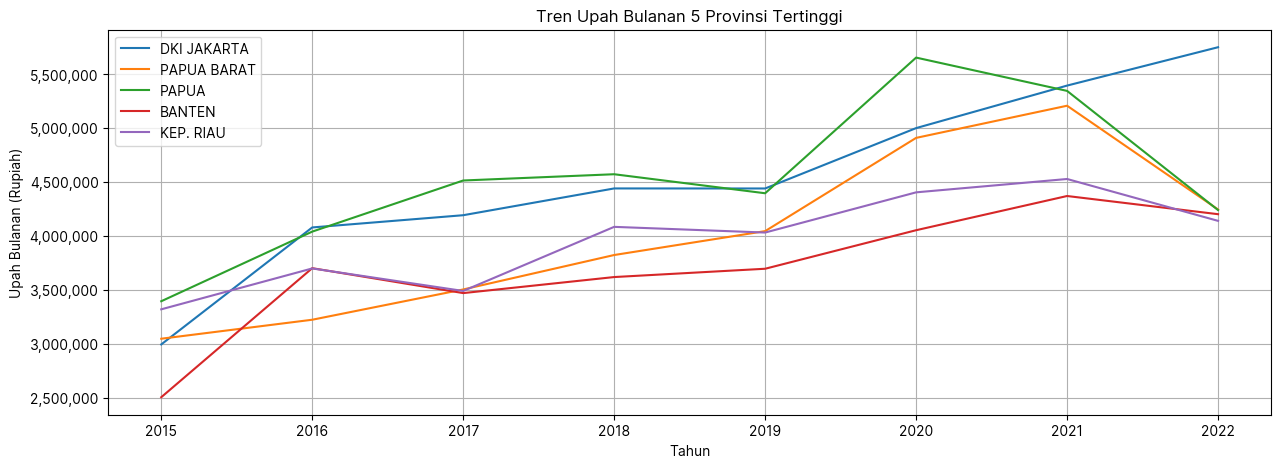

In [17]:
fig, ax = plt.subplots(figsize = (15, 5))

upah_tahunan_top_5 = upah_df[upah_df.provinsi.isin(provinsi_top_5)]

for provinsi in provinsi_top_5:
    upah_provinsi = upah_tahunan_top_5[upah_tahunan_top_5["provinsi"] == provinsi]
    ax.plot(upah_provinsi.tahun, upah_provinsi["upah_bulanan"], label = provinsi)

ax.set_xlabel('Tahun')
ax.set_ylabel('Upah Bulanan (Rupiah)')
ax.set_title('Tren Upah Bulanan 5 Provinsi Tertinggi')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()

plt.legend(loc = 2)
plt.show()

In [18]:
# perbandingan persentase pengeluaran dan pemasukan

peng_total_daerah = peng_df[peng_df['jenis'] == 'TOTAL'].groupby(['provinsi'])['peng'].mean().round(0).reset_index()
# peng_total_daerah = peng_total_rerata.groupby(['provinsi']).mean().round(0).reset_index()

upah_daerah = upah_df.groupby(['provinsi'])['upah_bulanan'].mean().round(0).reset_index()


persentase_df = pd.DataFrame(columns = ['provinsi', 'persentase', 'pengeluaran', 'upah_bulanan'])
persentase_df['provinsi'] = peng_total_daerah['provinsi']

for i, row in peng_total_daerah.iterrows():
    upah_prov = upah_daerah[
        upah_daerah.provinsi == row.provinsi
    ]
    
    persentase = (row.peng / upah_prov.iloc[0]['upah_bulanan']) * 100
    persentase_df.at[i, 'persentase'] = persentase
    persentase_df.at[i, 'pengeluaran'] = row.peng
    persentase_df.at[i, 'upah_bulanan'] = upah_prov.iloc[0]['upah_bulanan']

persentase_df = persentase_df.sort_values(by  = 'persentase', ascending = False)

persentase_df.head()

,provinsi,persentase,pengeluaran,upah_bulanan
16,KEP. BANGKA BELITUNG,50.462137,1404550.0,2783374.0
4,DI YOGYAKARTA,50.036311,1171305.0,2340910.0
21,NUSA TENGGARA BARAT,47.557973,960010.0,2018610.0
5,DKI JAKARTA,46.72655,2120320.0,4537720.0
9,JAWA TENGAH,46.123329,920213.0,1995114.0


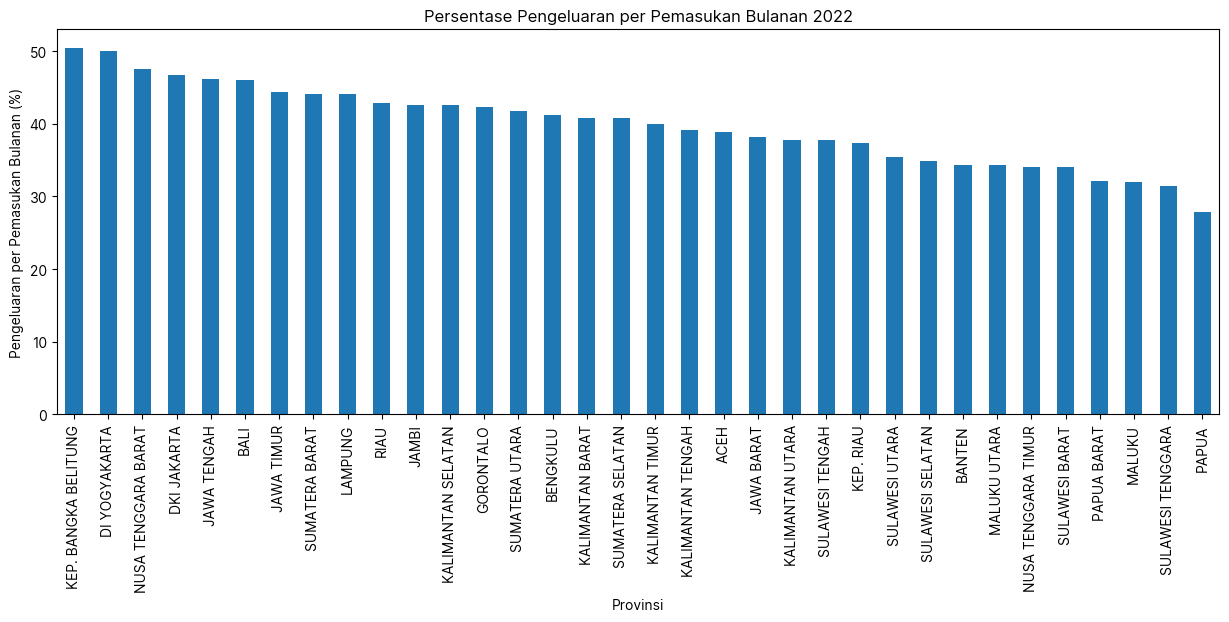

In [19]:

fig, ax = plt.subplots(figsize=(15, 5))
persentase_df.plot(kind="bar", ax=ax, x = 'provinsi', y = 'persentase')

ax.set_xlabel('Provinsi')
ax.set_ylabel('Pengeluaran per Pemasukan Bulanan (%)')
ax.set_title("Persentase Pengeluaran per Pemasukan Bulanan 2022")
ax.get_legend().remove()
plt.show()

In [20]:
provinsi = upah_df['provinsi'].unique()
wilayah = pd.read_csv(f'{PATH}/daftar-nama-daerah.csv')

koordinat_df = pd.DataFrame(columns = ['provinsi', 'lat', 'lon'])
                            
for prov in provinsi:
    if prov == 'INDONESIA':
        continue
    koordinat =  wilayah[wilayah['name'].str.lower() == f'provinsi {prov.lower()}']
    koordinat_df = pd.concat([koordinat_df, pd.DataFrame([{
        'provinsi': prov,
        'lat': koordinat['latitude'].values[0],
        'lon': koordinat['longitude'].values[0]
    
    }])], ignore_index = True)

/var/folders/dx/4c8f9zps2334_ngxgzvyjj4w0000gn/T/ipykernel_6450/3333317212.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  koordinat_df = pd.concat([koordinat_df, pd.DataFrame([{


In [21]:
# geospatial: visualize areas with upah

def init_indo_map():
    figure = folium.Figure(width=1200, height=500)
    m = folium.Map(location=[-2.548926, 118.0148634], 
               zoom_start=5.2,
               scrollWheelZoom=False, dragging = False)

    return figure, m

figure, m = init_indo_map()
wilayah = pd.read_csv(f'{PATH}/daftar-nama-daerah.csv')
provinsi = upah_daerah['provinsi'].unique()

mean = upah_daerah['upah_bulanan'].mean() 
quantile_25 = upah_daerah['upah_bulanan'].quantile(0.25)
quantile_75 = upah_daerah['upah_bulanan'].quantile(0.75)

print(f"Mean: {mean}, 25th percentile: {quantile_25}, 75th percentile: {quantile_75}")


for prov in provinsi:
    value = upah_daerah[(upah_daerah['provinsi'] == prov)].iloc[0]["upah_bulanan"]
    location =  koordinat_df[koordinat_df['provinsi'] == prov]
    
    if (value > 0 and value <= quantile_25):
        color = '#b3cde0'
    elif (value > quantile_25 and value <= mean):
        color = '#6497b1'
    elif (value > mean and value <= quantile_75):
        color = '#005b96'
    else:
        color = '#03396c'


    folium.Circle(
        location=[location['lat'].values[0], location['lon'].values[0]],
        color=color,
        fill=True,
        fill_color=color,
        radius = value / 25,
    ).add_to(m)

    folium.Marker(
        location=[location['lat'].values[0], location['lon'].values[0]],
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(15,10),
            html=f'<div style="font-size: 12pt; font-style: bold;">{round(value / 1e6, 2)}</div>',
        )
    ).add_to(m)

m.add_to(figure)
m

Mean: 2930675.0, 25th percentile: 2456025.0, 75th percentile: 3153815.5


In [22]:
# choropleth map

import json
import plotly.graph_objects as go
import geopandas as gpd


df_geo = gpd.read_file(f'{PATH}/geo_IDN.json')
df_geo["NAME_1"] = df_geo["NAME_1"].str.upper()

upah_daerah_merged = pd.merge(df_geo, upah_daerah, left_on = 'NAME_1', right_on = 'provinsi', how = 'left')[['provinsi', 'upah_bulanan', 'geometry']]
upah_daerah_merged


,provinsi,upah_bulanan,geometry
0,ACEH,2649878.0,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,BALI,2774310.0,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,KEP. BANGKA BELITUNG,2783374.0,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,BANTEN,3702644.0,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,BENGKULU,2662352.0,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."
5,GORONTALO,2316930.0,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0..."
6,DKI JAKARTA,4537720.0,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
7,JAMBI,2567070.0,"MULTIPOLYGON (((104.40900 -0.85951, 104.40870 ..."
8,JAWA BARAT,2954160.0,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ..."
9,JAWA TENGAH,1995114.0,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


In [23]:
upah_daerah_merged['coords'] = upah_daerah_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
upah_daerah_merged['coords'] = [coords[0] for coords in upah_daerah_merged['coords']]
# upah_daerah_merged['gap_upah_ump'] = upah_daerah_merged['upah_bulanan'] - ump_df[ump_df.tahun == 2022].ump.mean().round(0)


In [24]:
# choropleth map with gap upah ump

from matplotlib.colors import TwoSlopeNorm


upah_daerah_gap = upah_df.groupby(['provinsi'])['gap_upah_ump'].mean().round(0).reset_index()
upah_daerah_gap['gap_upah_ump'] = upah_daerah_gap['gap_upah_ump'].astype(float)

upah_daerah_merged_gap = pd.merge(df_geo, upah_daerah_gap, left_on = 'NAME_1', right_on = 'provinsi', how = 'left')[['provinsi', 'gap_upah_ump', 'geometry']]
upah_daerah_merged_gap['coords'] = upah_daerah_merged_gap['geometry'].apply(lambda x: x.representative_point().coords[:])
upah_daerah_merged_gap['coords'] = [coords[0] for coords in upah_daerah_merged_gap['coords']]

<Axes: title={'center': "Indonesia's Average Monthly Wage Gap with UMP by Province (Per Million Rupiah)"}>

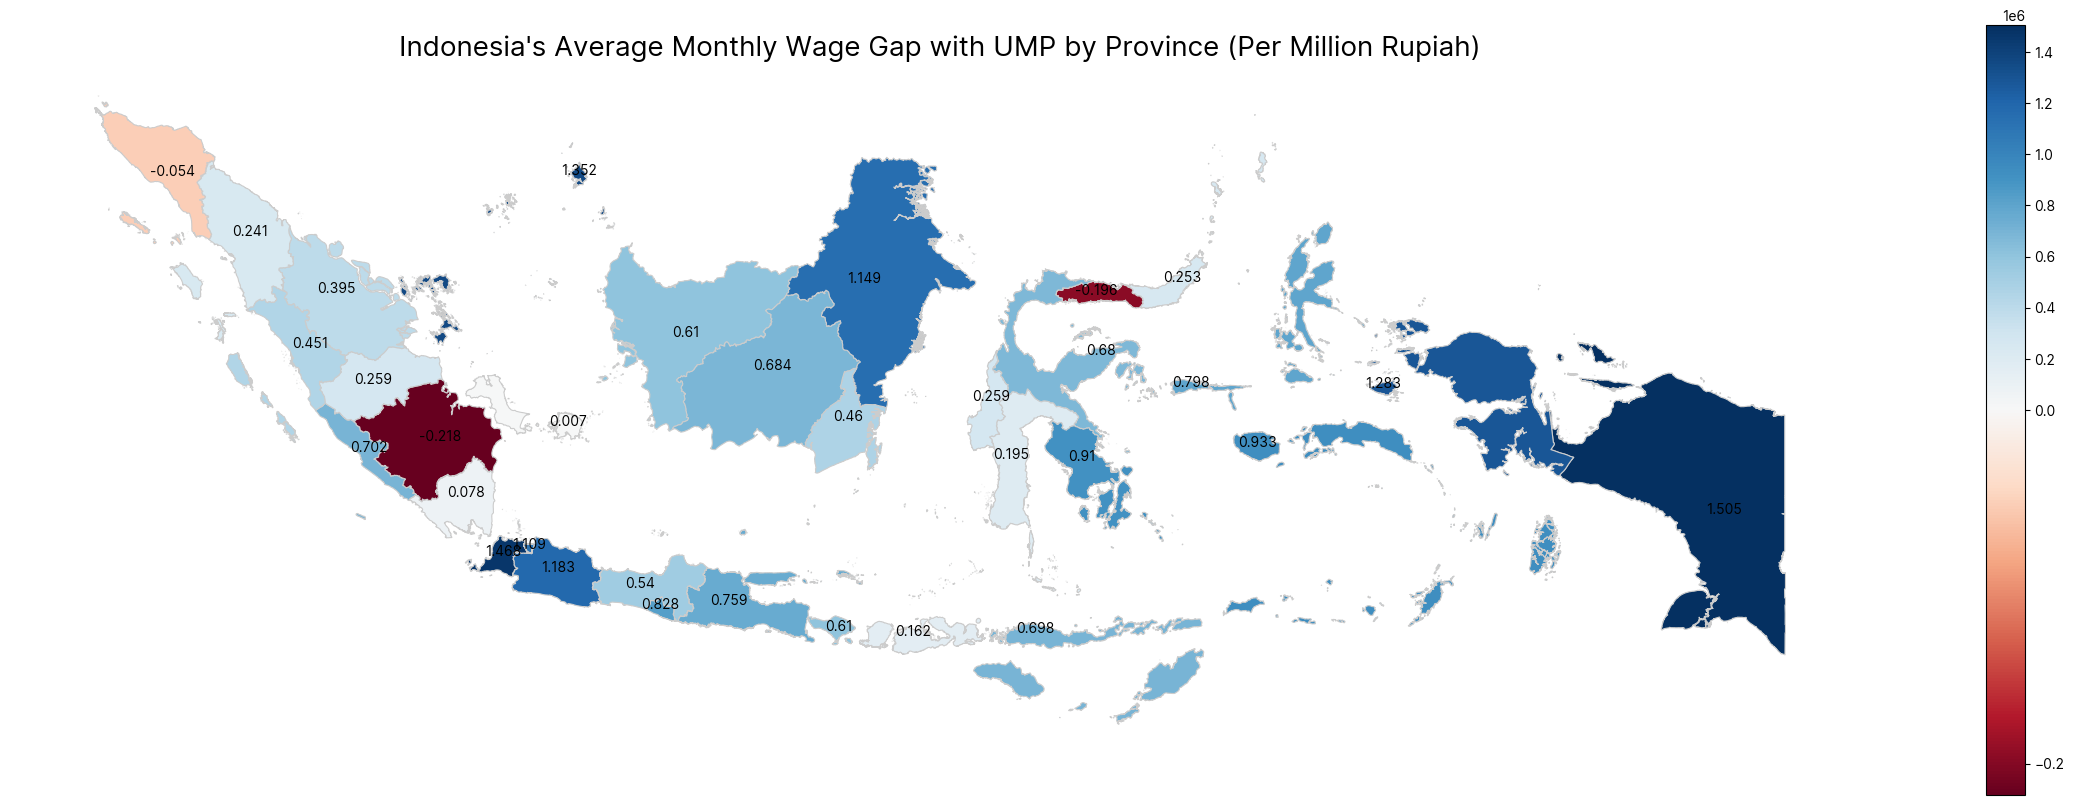

In [25]:
fig, ax = plt.subplots(figsize = (30, 10))

column_name = 'gap_upah_ump'

value_min = upah_daerah_merged_gap['gap_upah_ump'].min()
value_max = upah_daerah_merged_gap['gap_upah_ump'].max()

ax.axis('off')

title = 'Indonesia\'s Average Monthly Wage Gap with UMP by Province (Per Million Rupiah)'

ax.set_title(title, fontdict = {'fontsize': '20'})

for idx, row in upah_daerah_merged_gap.iterrows():
    ann = str(round(row[column_name] / 1e6, 3))
    plt.annotate(text = ann, xy = row['coords'], horizontalalignment = 'center')

upah_daerah_merged_gap.plot(column = column_name, 
                        cmap = 'RdBu', 
                        linewidth = 0.8, 
                        ax = ax, 
                        edgecolor = '0.8', 
                        legend = True,

                        norm = TwoSlopeNorm(vmin = value_min, vcenter = 0, vmax = value_max))

               provinsi  upah_bulanan  \
0                  ACEH     2649878.0   
1                  BALI     2774310.0   
2  KEP. BANGKA BELITUNG     2783374.0   
3                BANTEN     3702644.0   
4              BENGKULU     2662352.0   

                                            geometry  \
0  MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...   
1  MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...   
2  MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...   
3  MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...   
4  MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...   

                              coords  upah_bulanan_mult  
0    (97.12648970170963, 3.91033447)           6.423226  
1  (115.27006232908559, -8.45560598)           6.443155  
2  (107.9055363040837, -2.899278405)           6.444572  
3   (106.13333644092032, -6.4376955)           6.568512  
4  (102.47267181978891, -3.60203612)           6.425265  
1995114.0 4537720.0


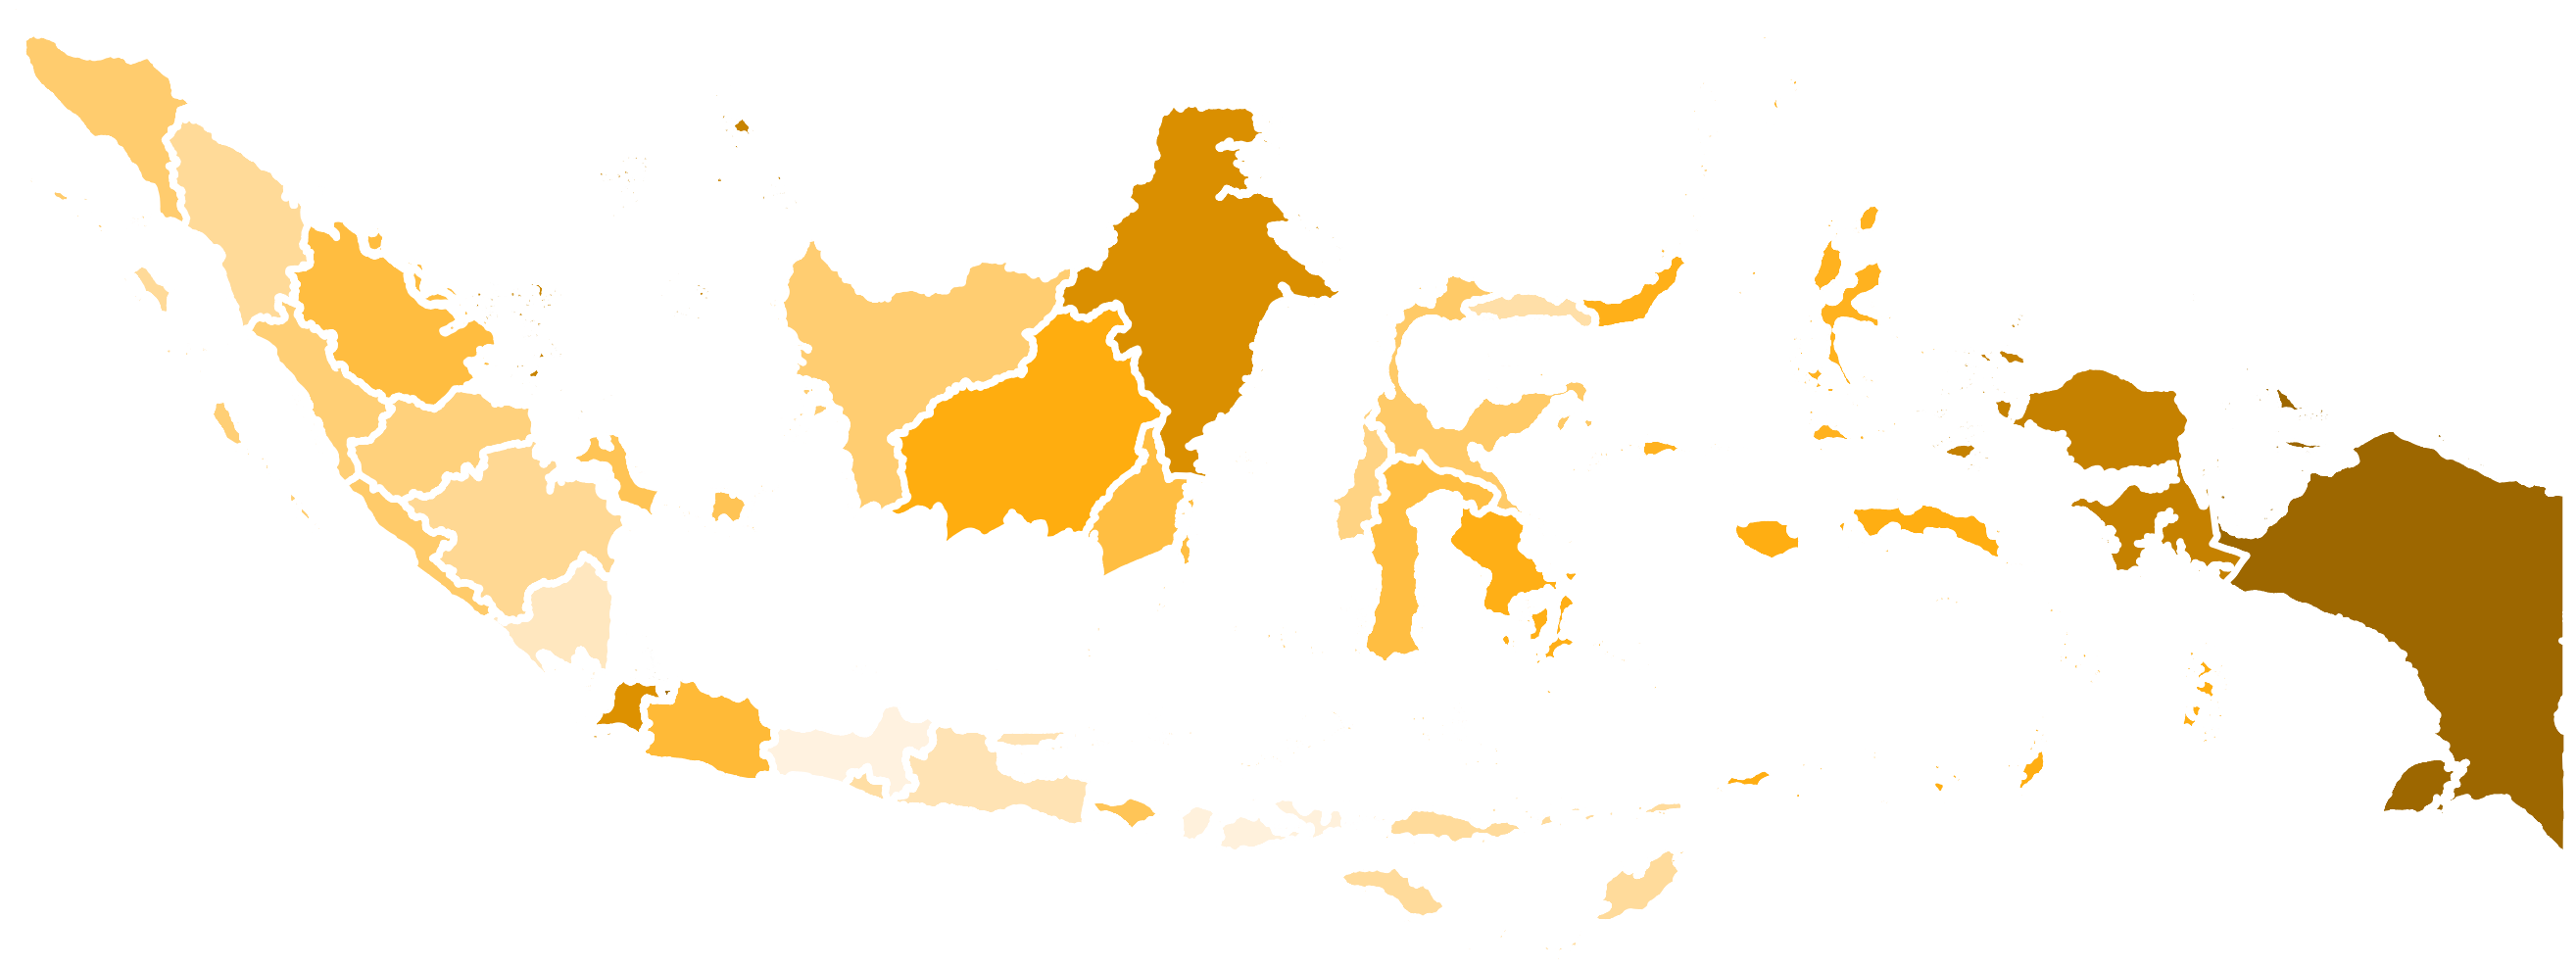

In [26]:
import math

fig, ax = plt.subplots(figsize = (30, 10))

column_name = 'upah_bulanan'

value_min = upah_daerah_merged['upah_bulanan'].min()
value_max = upah_daerah_merged['upah_bulanan'].max()

ax.axis('off')

title = 'Indonesia\'s Average Monthly Wage by Province (Per Million Rupiah)'


# for idx, row in upah_daerah_merged.iterrows():
#     ann = str(round(row[column_name] / 1e6, 3))
#     plt.annotate(text = ann, xy = row['coords'], horizontalalignment = 'center')

upah_daerah_merged[f"{column_name}_mult"] = upah_daerah_merged[column_name].apply(lambda x : math.log(x, 10))

print(upah_daerah_merged.head())
value_min = upah_daerah_merged[f"{column_name}"].min()
value_max = upah_daerah_merged[f"{column_name}"].max()

import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fff2e0","#ffa800","#9c6600"])
print(value_min, value_max)

upah_daerah_merged.plot(column = f"{column_name}", 
                        cmap = cmap,
                        linewidth = 5, 
                        ax = ax, 
                        edgecolor = '1', 
                        norm = plt.Normalize(vmin = value_min, vmax = value_max))
plt.margins(0)
plt.tight_layout()
plt.savefig("output/peta.png", transparent = True)
plt.show()

/var/folders/dx/4c8f9zps2334_ngxgzvyjj4w0000gn/T/ipykernel_6450/3449825745.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = ax.get_yticks(), fontsize = 14)


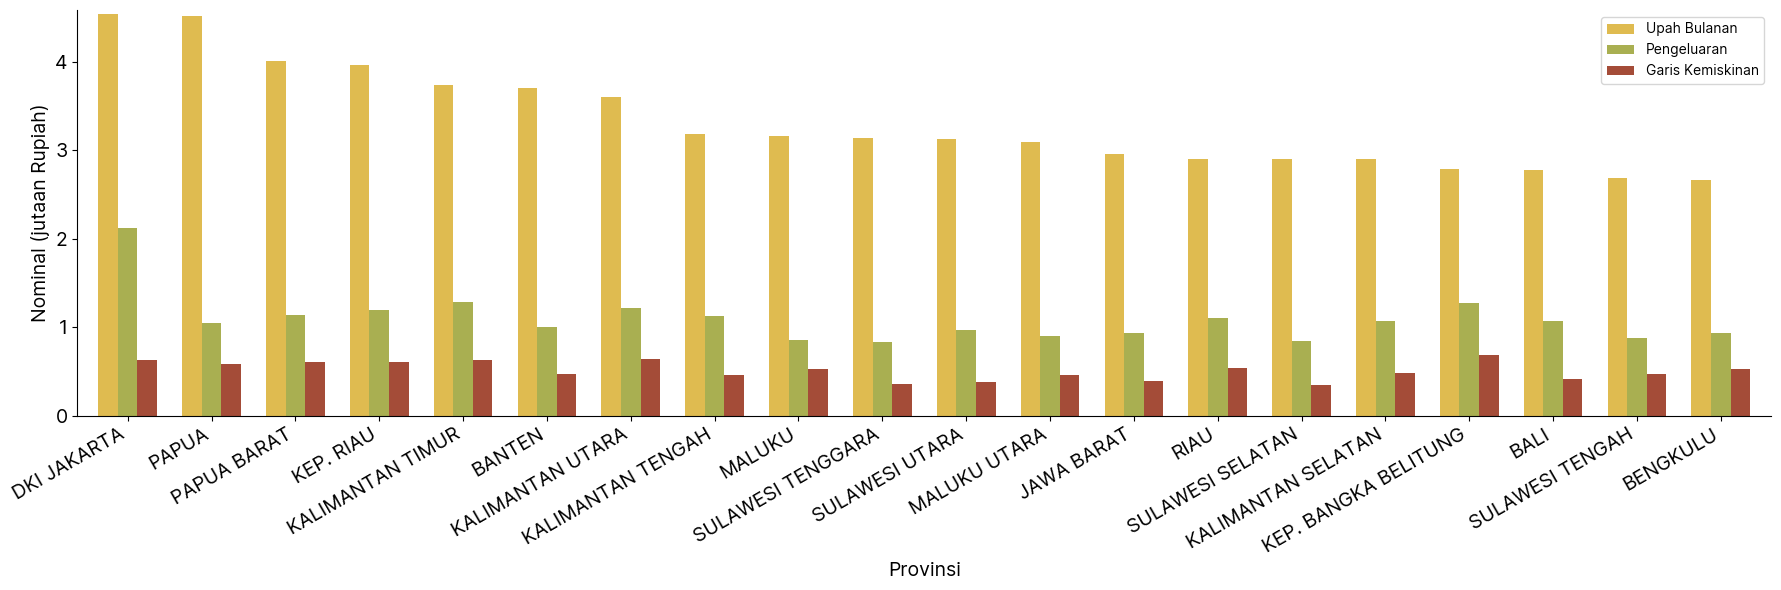

In [27]:
# nunjukin perbedaan upah bulanan sama ump???

from functools import reduce

ump_grouped = ump_df.groupby(['provinsi'])['ump'].mean().round(0).reset_index()
upah_grouped = upah_df.groupby(['provinsi'])['upah_bulanan'].mean().round(0).reset_index()
upah_harian_grouped = upah_df.groupby(['provinsi'])['upah_harian'].mean().round(0).reset_index()
gk_grouped = gk_total.groupby(['provinsi'])['gk'].mean().round(0).reset_index()
peng_grouped = peng_total.groupby(['provinsi'])['peng'].mean().round(0).reset_index()


fig, ax = plt.subplots(figsize = (18, 6))

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['provinsi'],
                                            how='outer'), [ump_grouped, upah_grouped, gk_grouped, peng_grouped])

df_merged = df_merged.sort_values(by = 'upah_bulanan', ascending = False)
df_merged = df_merged[['provinsi', 'gk', 'upah_bulanan', 'peng']]

# get the top 15 results
df_merged = df_merged.head(20)
# switch gk and peng columns position
df_merged = df_merged[['provinsi', 'upah_bulanan', 'peng', 'gk']]

df_merged = df_merged.rename(columns = {'gk': 'Garis Kemiskinan', 'upah_bulanan': 'Upah Bulanan', 'peng': 'Pengeluaran'})

#
# create grouped bar chart using upah_bulanan, peng, and gk

# ax.bar(df_merged['provinsi'], df_merged['upah_bulanan'], label = 'Upah Bulanan')
# # ax.bar(df_merged['provinsi'], df_merged['ump'], label = 'UMP')
# ax.bar(df_merged['provinsi'], df_merged['peng'], label = 'Pengeluaran')
# ax.bar(df_merged['provinsi'], df_merged['gk'], label = 'Garis Kemiskinan')
colors = [ '#DFBB50','#A9AF51', '#A44C38', ]

df_merged.plot(x = 'provinsi', kind = 'bar', stacked = False, ax = ax, width = 0.7, color = colors)

# set the colors

# set y tick labels size to 14
ax.set_yticklabels(labels = ax.get_yticks(), fontsize = 14)



ax.set_xticklabels(labels = df_merged['provinsi'], fontsize = 14, rotation = 30, ha = 'right')
ax.set_xlabel('Provinsi', fontsize = 14)
ax.set_ylabel('Nominal (jutaan Rupiah)', fontsize = 14)

# change the y label to one digit integer e.g. 1,000,000 becomes 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1e6)))
ax.margins(0.01)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
# move the x labels to left a bit
fig.tight_layout()
plt.savefig('output/ump_upah_gk_peng.png', transparent = True)
plt.legend()

In [28]:
# korelasi antar variable
df_corr = df_merged.drop(columns = ["provinsi"])
df_corr["upah_harian"] = upah_harian_grouped["upah_harian"]
df_corr.corr()

,Upah Bulanan,Pengeluaran,Garis Kemiskinan,upah_harian
Upah Bulanan,1.000000,0.595707,0.512885,1.000000
Pengeluaran,0.595707,1.000000,0.608166,0.595678
Garis Kemiskinan,0.512885,0.608166,1.000000,0.512890
upah_harian,1.000000,0.595678,0.512890,1.000000


KeyError: "None of [Index(['ump', 'gk'], dtype='object')] are in the [columns]"

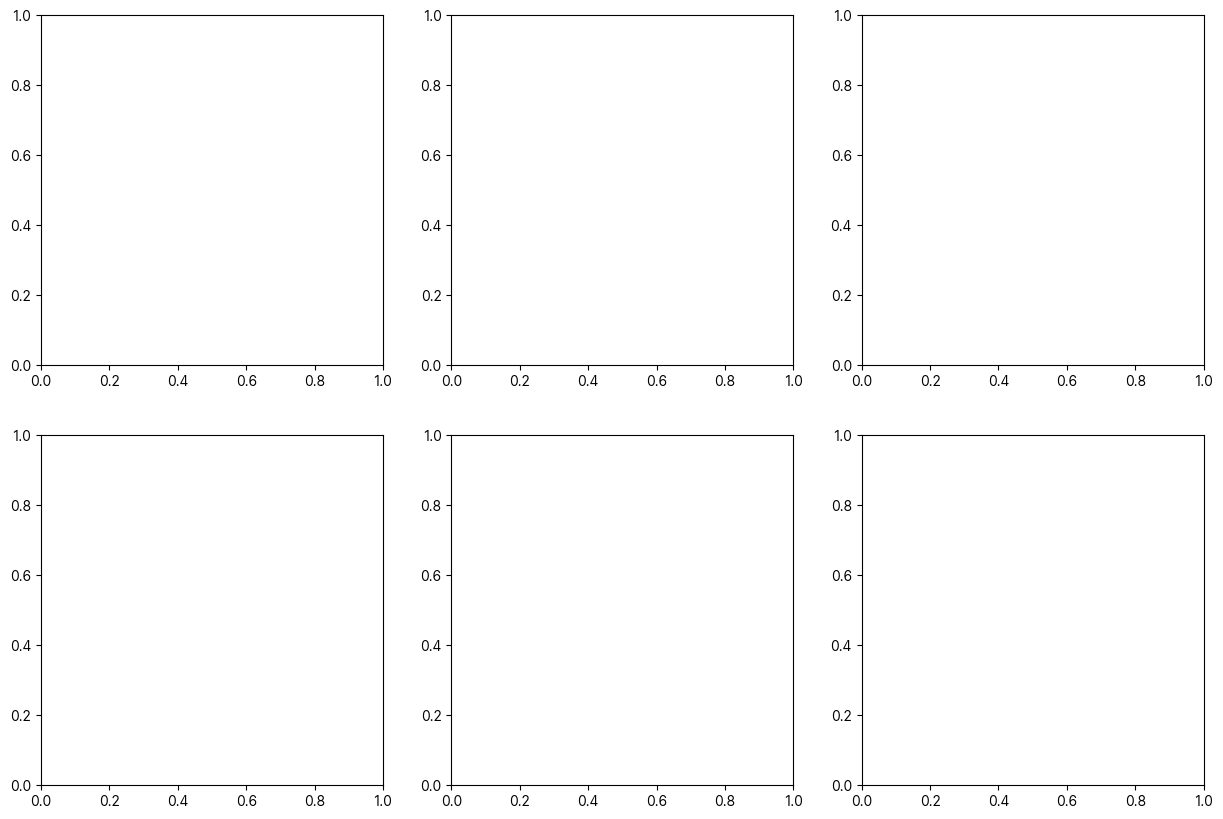

In [29]:
# korelasi antara garis kemiskinan dan UMP?
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (15, 10))

df_corr[['ump', 'gk']].plot(kind = 'scatter', x = 'ump', y = 'gk', ax = axes[0, 0], subplots = True)
axes[0, 0].set_title('Korelasi UMP dan Garis Kemiskinan')
axes[0, 0].set_xlabel('UMP')
axes[0, 0].set_ylabel('Garis Kemiskinan')

df_corr[['upah_harian', 'gk']].plot(kind = 'scatter', x = 'upah_harian', y = 'gk', ax = axes[0, 1], subplots = True)
axes[0, 1].set_title('Korelasi Upah Harian dan Garis Kemiskinan')
axes[0, 1].set_xlabel('Upah Harian')
axes[0, 1].set_ylabel('Garis Kemiskinan')

df_corr[['peng', 'gk']].plot(kind = 'scatter', x = 'peng', y = 'gk', ax = axes[1, 0], subplots = True)
axes[1, 0].set_title('Korelasi Pengeluaran dan Garis Kemiskinan')
axes[1, 0].set_xlabel('Pengeluaran')
axes[1, 0].set_ylabel('Garis Kemiskinan')

df_corr[['upah_harian', 'peng']].plot(kind = 'scatter', x = 'upah_harian', y = 'peng', ax = axes[1, 1], subplots = True)
axes[1, 1].set_title('Korelasi Upah Harian dan Pengeluaran')
axes[1, 1].set_xlabel('Upah Harian')
axes[1, 1].set_ylabel('Pengeluaran')

df_corr[['upah_harian', 'ump']].plot(kind = 'scatter', x = 'upah_harian', y = 'ump', ax = axes[0, 2], subplots = True)
axes[0, 2].set_title('Korelasi Upah Harian dan UMP')
axes[0, 2].set_xlabel('Upah Harian')
axes[0, 2].set_ylabel('UMP')

df_corr[['ump', 'peng']].plot(kind = 'scatter', x = 'ump', y = 'peng', ax = axes[1, 2], subplots = True)
axes[1, 2].set_title('Korelasi UMP dan Pengeluaran')
axes[1, 2].set_xlabel('UMP')
axes[1, 2].set_ylabel('Pengeluaran')

plt.tight_layout()
plt.show()


   tahun        ump  upah_bulanan        gk       peng
0   2015  1694375.0     2283191.0  387015.0   767707.0
1   2016  1906790.0     2660318.0  408040.0   840587.0
2   2017  2073332.0     2762765.0  433456.0   914925.0
3   2018  2268874.0     2800403.0  458981.0   988994.0
4   2019  2455662.0     2930975.0  492301.0  1028305.0
5   2020  2672371.0     3438647.0  512581.0  1080595.0
6   2021  2684743.0     3418443.0  542793.0  1113417.0
7   2022  2729463.0     3150659.0  597592.0  1166040.0


/var/folders/dx/4c8f9zps2334_ngxgzvyjj4w0000gn/T/ipykernel_6450/3379835709.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = df_merged['tahun'])


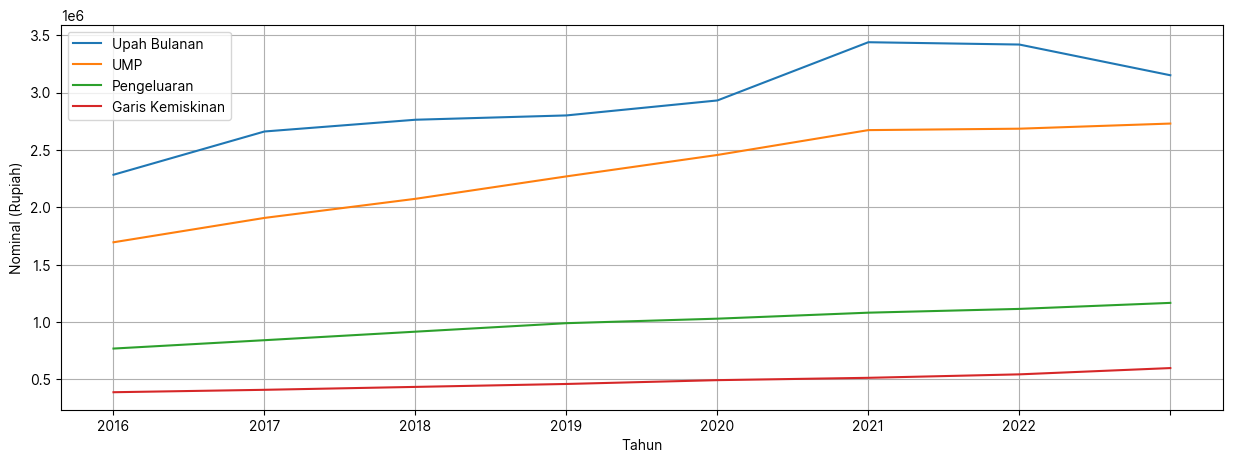

In [30]:
ump_grouped = ump_df.groupby(['tahun'])['ump'].mean().round(0).reset_index()
upah_grouped = upah_df.groupby(['tahun'])['upah_bulanan'].mean().round(0).reset_index()
upah_harian_grouped = upah_df.groupby(['tahun'])['upah_harian'].mean().round(0).reset_index()
gk_grouped = gk_total.groupby(['tahun'])['gk'].mean().round(0).reset_index()
peng_grouped = peng_total.groupby(['tahun'])['peng'].mean().round(0).reset_index()


fig, ax = plt.subplots(figsize = (15, 5))

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['tahun'],
                                            how='outer'), [ump_grouped, upah_grouped, gk_grouped, peng_grouped])

df_merged = df_merged.sort_values(by = 'tahun', ascending = True).reset_index(drop = True)

print(df_merged)

ax.plot(df_merged['tahun'], df_merged['upah_bulanan'], label = 'Upah Bulanan')
ax.plot(df_merged['tahun'], df_merged['ump'], label = 'UMP')
ax.plot(df_merged['tahun'], df_merged['peng'], label = 'Pengeluaran')
ax.plot(df_merged['tahun'], df_merged['gk'], label = 'Garis Kemiskinan')
ax.set_xticklabels(labels = df_merged['tahun'])
ax.set_xlabel('Tahun')
ax.set_ylabel('Nominal (Rupiah)')
plt.legend()
plt.grid()
plt.show()

In [31]:
# prediksi: pake arima (nangid)

from statsmodels.tsa.arima.model import ARIMA

upah_bulanan_history = df_merged['upah_bulanan']
ump_history = df_merged['ump']
gk_history = df_merged['gk']
peng_history = df_merged['peng']

for i in range(3):
    model = ARIMA(upah_bulanan_history, order = (1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    upah_bulanan_history = pd.concat([upah_bulanan_history, pd.Series(output)], ignore_index = True)

    model = ARIMA(ump_history, order = (1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    ump_history = pd.concat([ump_history, pd.Series(output)], ignore_index = True)

    model = ARIMA(gk_history, order = (1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    gk_history = pd.concat([gk_history, pd.Series(output)], ignore_index = True)

    model = ARIMA(peng_history, order = (1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    peng_history = pd.concat([peng_history, pd.Series(output)], ignore_index = True)


tahun = df_merged['tahun']


/Users/afan/miniconda3/envs/visdat1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/afan/miniconda3/envs/visdat1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/afan/miniconda3/envs/visdat1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/afan/miniconda3/envs/visdat1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

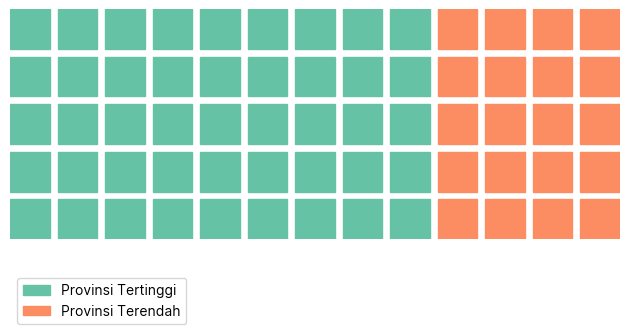

In [32]:
from pywaffle import Waffle

# waffle chart: perbandingan upah provinsi tertinggi dan terendah

data = {
    'Provinsi Tertinggi': upah_daerah_merged['upah_bulanan'].max()/1e5,
    'Provinsi Terendah': upah_daerah_merged['upah_bulanan'].min()/1e5
}

fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    values = data,
    legend = {
        'labels': ['Provinsi Tertinggi', 'Provinsi Terendah'],
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4)
    }
)

plt.show()

In [33]:
upah_df

,provinsi,tahun,upah_harian,upah_bulanan,dibawah_ump,gap_upah_ump,daerah
0,ACEH,2015,11226,1975776,False,75776.0,sumatera
1,ACEH,2016,13627,2398352,False,279852.0,sumatera
2,ACEH,2017,14809,2606384,False,106384.0,sumatera
3,ACEH,2018,13814,2431264,True,-268736.0,sumatera
4,ACEH,2019,15065,2651440,True,-265370.0,sumatera
...,...,...,...,...,...,...,...
267,PAPUA,2018,25987,4573712,False,1573712.0,daerah_timur
268,PAPUA,2019,24984,4397184,False,1156284.0,daerah_timur
269,PAPUA,2020,32138,5656288,False,2139588.0,daerah_timur
270,PAPUA,2021,30382,5347232,False,1830532.0,daerah_timur


In [34]:
upah_df

,provinsi,tahun,upah_harian,upah_bulanan,dibawah_ump,gap_upah_ump,daerah
0,ACEH,2015,11226,1975776,False,75776.0,sumatera
1,ACEH,2016,13627,2398352,False,279852.0,sumatera
2,ACEH,2017,14809,2606384,False,106384.0,sumatera
3,ACEH,2018,13814,2431264,True,-268736.0,sumatera
4,ACEH,2019,15065,2651440,True,-265370.0,sumatera
...,...,...,...,...,...,...,...
267,PAPUA,2018,25987,4573712,False,1573712.0,daerah_timur
268,PAPUA,2019,24984,4397184,False,1156284.0,daerah_timur
269,PAPUA,2020,32138,5656288,False,2139588.0,daerah_timur
270,PAPUA,2021,30382,5347232,False,1830532.0,daerah_timur


/var/folders/dx/4c8f9zps2334_ngxgzvyjj4w0000gn/T/ipykernel_6450/259055997.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ump_upah_merged_provinsi["provinsi"], rotation = 30, fontsize = 14, ha = 'right')


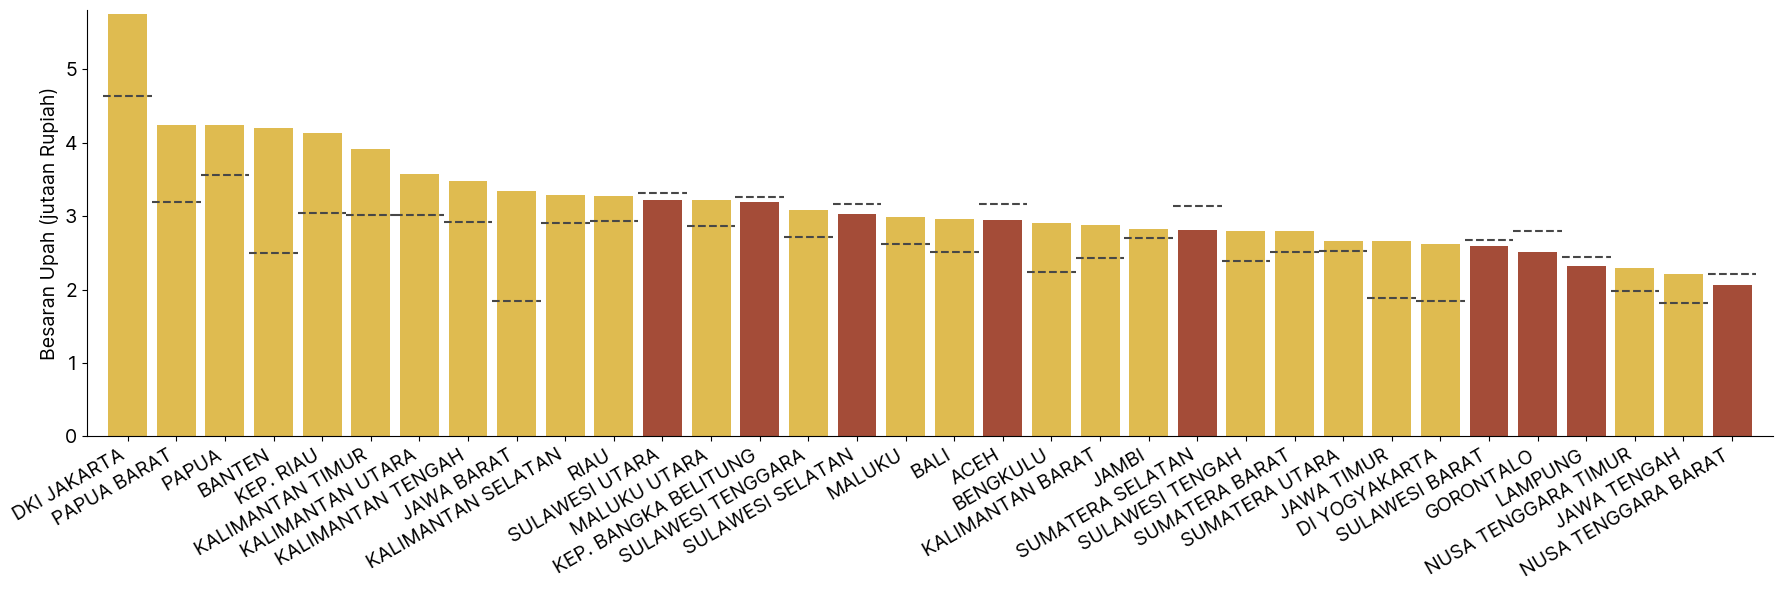

In [35]:
# floating chart untuk perbandingan upah bulanan dan ump

fig, ax = plt.subplots(figsize = (18, 6))

ump_merged_provinsi = ump_df[ump_df['tahun'] == 2022].groupby(["provinsi"]).mean().reset_index()[["provinsi", "ump"]]
upah_merged_provinsi = upah_df[ump_df['tahun'] == 2022].groupby(["provinsi"])[["upah_bulanan"]].mean().reset_index()
ump_upah_merged_provinsi = pd.merge(ump_merged_provinsi, upah_merged_provinsi, on = 'provinsi', how = 'outer').sort_values(by = "upah_bulanan", ascending = False).reset_index()

# if 'upah_bulanan' < 'ump', color #A44C38, else color #DFBB50
colors = ump_upah_merged_provinsi.apply(lambda x: '#A44C38' if x['upah_bulanan'] < x['ump'] else '#DFBB50', axis = 1)

ax.bar(ump_upah_merged_provinsi["provinsi"], ump_upah_merged_provinsi["upah_bulanan"], color=colors, label = "Upah Bulanan")

# set y label to rotate 90 degrees
ax.set_xticklabels(labels = ump_upah_merged_provinsi["provinsi"], rotation = 30, fontsize = 14, ha = 'right')

# for each bar, create a threshold line based on the value in ump_merged_provinsi where column provinsi = bar label
for i, row in ump_upah_merged_provinsi.iterrows():
    ump_prov = ump_upah_merged_provinsi[ump_upah_merged_provinsi["provinsi"] == row["provinsi"]].iloc[0]
    # make sure the threshold line is only for that one bar
    plt.hlines(y = ump_prov['ump'], xmin = i - 0.5, xmax = i + 0.5, color = '#474747', linestyle = '--')


# # change the y axis label to 'Besaran Upah (Rupiah)'
# ax.set_xlabel('Provinsi', fontsize = 14)
ax.set_ylabel('Besaran Upah (jutaan Rupiah)', fontsize = 14)
# # remove the 1e6 notation in y axis, but maintain label to still be number
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1e6)))
# set y tick label size to 14
ax.tick_params(axis = 'y', labelsize = 14)
#  remote the empty spaces between the top and bottom of chart
ax.margins(0.01)

# remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.savefig('output/upah_bulanan_ump.png', transparent = True)
plt.show()
